<a href="https://colab.research.google.com/github/arpitsharma27/PythonPractice/blob/main/UniversityOf_Michigan_Week3_Nhanes_Multivariate_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
df=pd.read_csv(url)

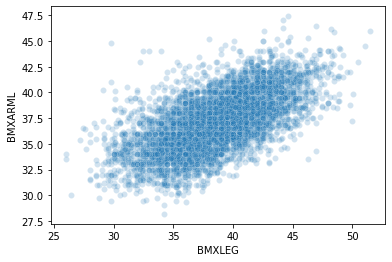

In [8]:
sns.scatterplot(data=df, x="BMXLEG", y="BMXARML",alpha=0.2)
plt.show()

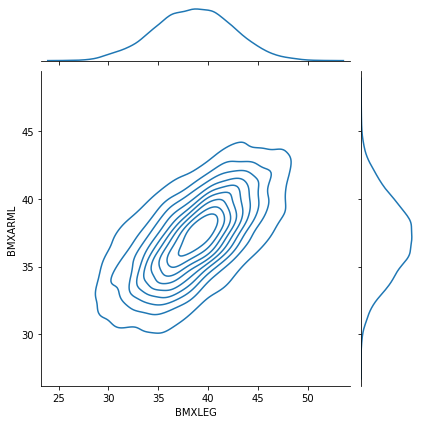

In [10]:
sns.jointplot(x='BMXLEG',y='BMXARML', kind='kde', data=df)
plt.show()

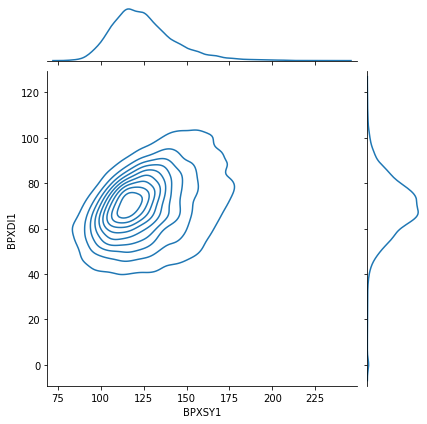

In [12]:
sns.jointplot(data=df,x='BPXSY1',y='BPXDI1', kind='kde')
plt.show()

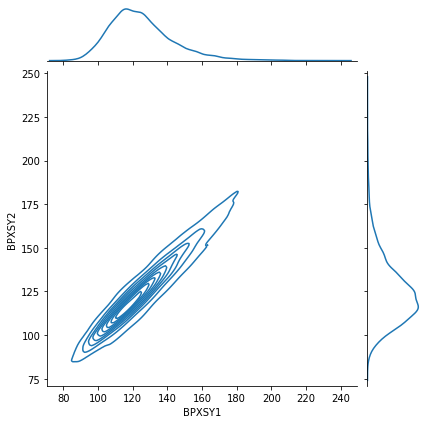

In [14]:
jp=sns.jointplot(x='BPXSY1',y='BPXSY2', kind = 'kde', data=df)
plt.show()

# **Hetrogeneity and Stratification**

Most human characteristics are complex-- they vary by gender, age, ethnicity etc. This type of variation is often referred as "**Hetrogeneity**". When such hetrogeneity is present, it is usually productive to explore the data more deeply by stratifying on relevant facotors, as we did in the univariate analyses.

Below, we continue to probe the relationship between leg length and arm length, stratifying first by gender, then by gender and ethnicity. The gender-stratified plot indicates that men tend to have somewhat longer arms and legs than women-- this is reflected in the fact that the cloud of points on the left is shifted slightly up and to the right relative to the cloud of points on the right. In addition, the correlation between arm length and leg length appears to be somewhat weaker in women than in men.

In [19]:
df['RIAGENDRx']=df.RIAGENDR.replace({1:"Male" , 2:"Female"})

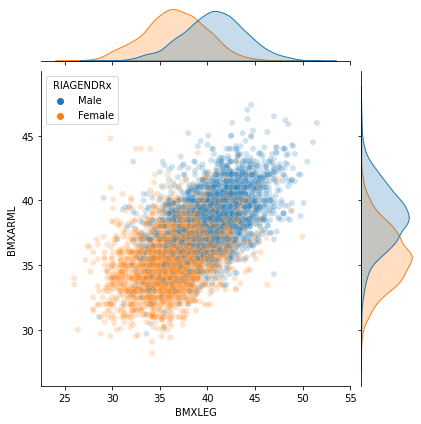

In [20]:
sns.jointplot(data=df, x='BMXLEG', y='BMXARML',alpha=0.2, hue='RIAGENDRx')
plt.show()

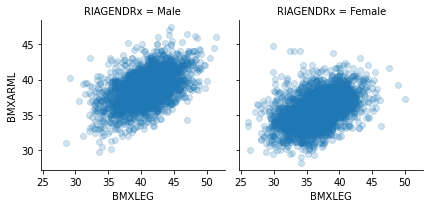

In [22]:
sns.FacetGrid(df,col='RIAGENDRx').map(plt.scatter,"BMXLEG","BMXARML",alpha=0.2).add_legend()

In [23]:
print(df.BMXLEG.corr(df.BMXARML))

0.6245370012742503


In [24]:
df.groupby('RIAGENDRx')[['BMXLEG','BMXARML']].corr()

BMXLEG   BMXARML
RIAGENDRx                            
Female    BMXLEG   1.000000  0.434703
          BMXARML  0.434703  1.000000
Male      BMXLEG   1.000000  0.505426
          BMXARML  0.505426  1.000000

In [25]:
print(df.loc[df.RIAGENDRx=="Female", ["BMXLEG", "BMXARML"]].dropna().corr())
print(df.loc[df.RIAGENDRx=="Male", ["BMXLEG", "BMXARML"]].dropna().corr())

           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000


In [26]:
#RIDRETH1=Ethnicity variable
df.RIDRETH1.value_counts()

3    1839
4    1227
1    1018
5     901
2     750
Name: RIDRETH1, dtype: int64

In [38]:
df.groupby(['RIDRETH1','RIAGENDRx'])[['BMXLEG' , 'BMXARML']].corr().unstack()

BMXLEG             BMXARML        
                   BMXLEG   BMXARML    BMXLEG BMXARML
RIDRETH1 RIAGENDRx                                   
1        Female       1.0  0.338454  0.338454     1.0
         Male         1.0  0.468394  0.468394     1.0
2        Female       1.0  0.402869  0.402869     1.0
         Male         1.0  0.366049  0.366049     1.0
3        Female       1.0  0.331924  0.331924     1.0
         Male         1.0  0.425126  0.425126     1.0
4        Female       1.0  0.240559  0.240559     1.0
         Male         1.0  0.393505  0.393505     1.0
5        Female       1.0  0.549025  0.549025     1.0
         Male         1.0  0.631437  0.631437     1.0

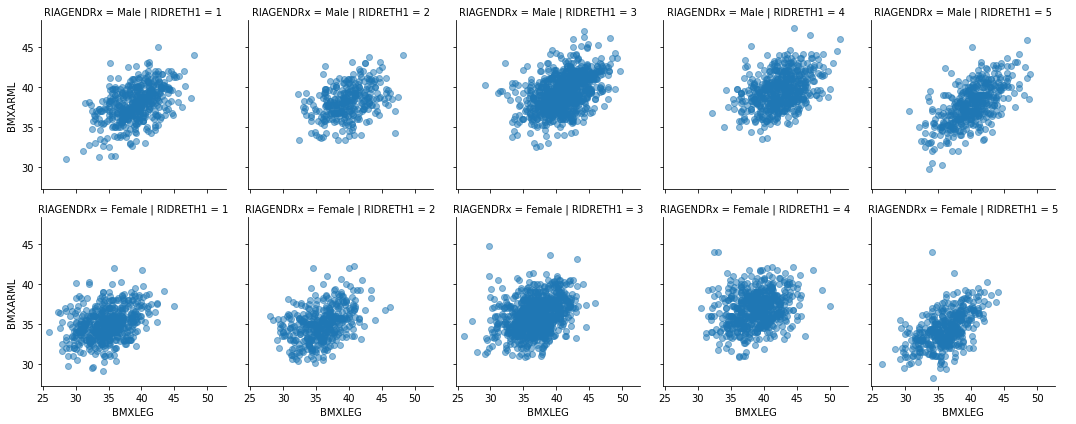

In [39]:
_ = sns.FacetGrid(df, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.5).add_legend()

In [40]:
df["DMDEDUC2x"]=df.DMDEDUC2.replace({1:"<9" ,2:"9-11" ,3:"HS/GED" ,4:"SomeCollege/AA" ,5:"College" ,7:"Refused" ,9:"Don't Know" })
df.DMDEDUC2x.value_counts()

SomeCollege/AA    1621
College           1366
HS/GED            1186
<9                 655
9-11               643
Don't Know           3
Name: DMDEDUC2x, dtype: int64

In [41]:
df.DMDMARTLx=df.DMDMARTL.replace({1:"Married" ,2:"Widowed" ,3:"Divorced" ,4:"Separated" ,5:"Never Married" ,6:"Living w/Partner" ,77:"Refused"})
df.DMDMARTLx.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Married             2780
Never Married       1004
Divorced             579
Living w/Partner     527
Widowed              396
Separated            186
Refused                2
Name: DMDMARTL, dtype: int64